# Classifiers and Object-oriented Programming

In this notebook, another dataset will be used: Coronavirus Tweets with a sentiment label (https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification).

This dataset will be used to test Naive Bayes, Logistic Regression and Multilayer Perceptron with text data.

Object-oriented programming will also be reviewed at the end of this notebook as it is fundamental for most of the data science libraries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Data import

In [3]:
df = pd.read_csv("Corona_NLP.csv",encoding='latin-1')
pd.options.display.max_colwidth = 500
df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,"As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU",Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,"Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented ""I'm in Civics class so I know what I'm talking about"". https://t.co/ieFDNeHgDO",Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,"Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16. We will continue to process online and phone orders as normal! Thank you for your understanding! https://t.co/kw91zJ5O5i",Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona",Negative


In [4]:
df  = df[['OriginalTweet', 'Sentiment']].head(10000)

In [5]:
set(df['Sentiment'].values)

{'Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'}

In [6]:
df['LabelSentiment'] = df['Sentiment'].apply(lambda x: 1 if x in ['Extremely Positive', 'Positive', 'Neutral'] else 0)

In [7]:
df.head()

,OriginalTweet,Sentiment,LabelSentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,1
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,1
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,1
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,1
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,0


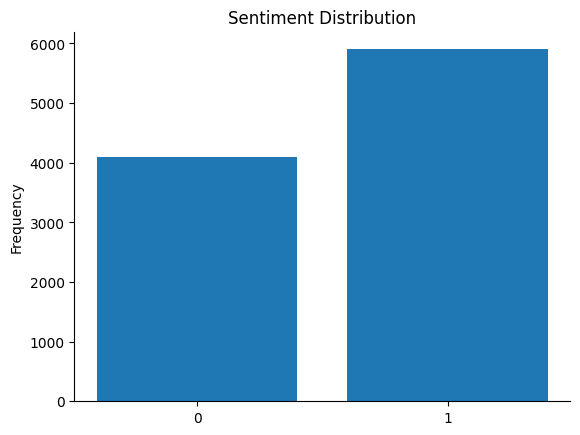

In [8]:
plt.bar(df['LabelSentiment'].value_counts().index,df['LabelSentiment'].value_counts().values)
plt.xticks([0,1])
plt.grid(False)
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Train-test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['OriginalTweet'], df['LabelSentiment'], test_size=0.20, random_state=4)

In [10]:
len(X_train), len(X_test), len(y_train), len(y_test)

(8000, 2000, 8000, 2000)

# Data cleaning

In [11]:
stop = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemma = WordNetLemmatizer()

In [12]:
from tqdm import tqdm
def clean(text_list):
    
    updates = []
    
    for j in tqdm(text_list):
        
        text = j
        
        #LOWERCASE TEXT
        text = text.lower()
        
        #REMOVE NUMERICAL DATA and PUNCTUATION
        text = re.sub("[^a-zA-Z]"," ", text )
        
        #REMOVE STOPWORDS
        text = " ".join([word for word in text.split() if word not in stop])
        
        #Lemmatize
        text = " ".join(lemma.lemmatize(word) for word in text.split())
            
        updates.append(text)
        
    return updates

In [13]:
X_train_clean = clean(X_train)

100%|██████████| 8000/8000 [00:01<00:00, 5361.24it/s]


In [14]:
X_test_clean = clean(X_test)

100%|██████████| 2000/2000 [00:00<00:00, 13215.07it/s]


# Feature engineering

In [15]:
tfidf = TfidfVectorizer(max_df=0.8, ngram_range=(1,2))

### Train

In [16]:
X = tfidf.fit_transform(X_train_clean).toarray()

In [17]:
X.shape

(8000, 128412)

In [18]:
y = y_train.to_numpy()

In [19]:
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

### Test

In [20]:
x_test = tfidf.transform(X_test_clean).toarray()

In [21]:
y_test = y_test.to_numpy()

# Train models and evaluate

# Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb = GaussianNB()

In [24]:
nb.fit(X, y)

GaussianNB()

### Predict

In [25]:
nb_pred = nb.predict(x_test)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.53      0.56      0.55       814
           1       0.69      0.66      0.67      1186

    accuracy                           0.62      2000
   macro avg       0.61      0.61      0.61      2000
weighted avg       0.63      0.62      0.62      2000



In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, nb_pred)

array([[459, 355],
       [402, 784]], dtype=int64)

### Attributes

* Check the probability of each class.

In [29]:
nb.class_prior_

array([0.4105, 0.5895])

* Verify the number of training samples observed in each class.

In [30]:
nb.class_count_

array([3284., 4716.])

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression(random_state=0)

In [33]:
lr.fit(X,y)

LogisticRegression(random_state=0)

In [34]:
lr.classes_

array([0, 1], dtype=int64)

In [35]:
lr.coef_

array([[-0.25648335, -0.08254218, -0.06357731, ...,  0.04333618,
         0.04333618,  0.03180903]])

In [36]:
lr.intercept_

array([0.3629579])

In [37]:
lr_pred = lr.predict(x_test)

In [38]:
lr_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [39]:
lr.predict_proba(x_test)

array([[0.32818594, 0.67181406],
       [0.78830148, 0.21169852],
       [0.17603667, 0.82396333],
       ...,
       [0.10340585, 0.89659415],
       [0.63180543, 0.36819457],
       [0.46382983, 0.53617017]])

In [41]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.80      0.54      0.64       814
           1       0.74      0.91      0.82      1186

    accuracy                           0.76      2000
   macro avg       0.77      0.72      0.73      2000
weighted avg       0.77      0.76      0.75      2000



In [40]:
confusion_matrix(y_test, lr_pred)

array([[ 437,  377],
       [ 107, 1079]], dtype=int64)

# Multilayer Perceptron - MLP

__The number of hidden layers__<br>
-	Increasing the number of hidden layers might or might not improve the accuracy, it depends on the complexity of the problem<br>
-	Increasing the number of hidden layers more than needed will cause overfit on the training set and a decrease in the accuracy value for the test set

__The number of hidden units__ <br>
-	Using too few neurons in the hidden layers will result in underfitting<br>
-	Using too many neurons in the hidden layer may result in overfitting and increases the training time of the neural network<br>

The aim is to keep a good trade-off between the simplicity of the model and the performance accuracy! <br>

__Different rules of thumb exist (take them with a grain of salt):__ <br>
-	The number of hidden neurons should be between the size of the input layer and the size of the output layer <br>
-	The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer  <br>
-	The number of hidden neurons should be less than twice the size of the input layer



In [41]:
from sklearn.neural_network import MLPClassifier

In [42]:
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(2,2), activation='logistic', random_state=1)

In [43]:
mlp.fit(X,y)

C:\Users\migue\anaconda3\envs\env1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(2, 2), random_state=1)

In [44]:
mlp_pred = mlp.predict(x_test)

In [45]:
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70       814
           1       0.78      0.87      0.82      1186

    accuracy                           0.78      2000
   macro avg       0.78      0.76      0.76      2000
weighted avg       0.78      0.78      0.77      2000



In [46]:
confusion_matrix(y_test, mlp_pred)

array([[ 520,  294],
       [ 150, 1036]], dtype=int64)

## Attributes

### Activation Function

In [49]:
model_relu = MLPClassifier(activation = 'relu')

__Advantages:__ <br>
     - Computationally efficient: allows the network to converge very quickly <br>
__Disadvantages:__ <br>
     - The dying ReLU problem : when inputs approach zero, or are negative, the gradient of the function becomes zero and the network cannot perform backpropagation and cannot learn

In [50]:
model_logistic = MLPClassifier(activation = 'logistic')

__Advantages:__ <br>
     - Smooth gradient, preventing “jumps” in output values <br>
     - Output values bound between 0 and 1, normalizing the output of each neuron <br>
__Disadvantages:__ <br>
     - Vanishing gradient: for very high or very low values of X, there is almost no change to the prediction, causing a vanishing gradient problem. This can result in the network refusing to learn further, or have slow convergence <br>
     - Computationally expensive

In [51]:
model_tanh = MLPClassifier(activation = 'tanh')

__Advantages:__ <br>
     - Zero centered: making it easier to model inputs that have strongly negative, neutral and strongly positive values. Other than that it is similar to the sigmoid function <br>
__Disadvantages:__ <br>
     - Same as with the sigmoid function

### Solver

In [52]:
model_sgd = MLPClassifier(solver = 'sgd')

__Notes__ <br>
    - While Gradient Descent use the whole training data to do a single update, in SGD a random data point of the training data to update the parameters (SGD is faster than GD) <br>
    - It uses a common learning rate for all parameters, contrarily to what happens in Adam

In [53]:
model_adam = MLPClassifier(solver = 'adam')

__When to use__ <br>
    - It achieves good results fast, which is good for complex models, if processing time is an issue

__Notes__ <br>
    - It computes individual adaptive learning rates for different parameters <br>
    - Adam combines the advantages of RMSProp and AdaGrad <br>

## Other Parameters

|Parameter| Definition | LBFGS | SGD | ADAM |
|---|---|---|---|---|
|alpha| L2 penalty (regularization term) parameter | yes | yes | yes |
| power_t | The exponent for inverse scaling learning rate. It is used in updating effective learning rate when the learning_rate is set to ‘invscaling’. | no | yes | no |
| shuffle | Whether to shuffle samples in each iteration. | no | yes | yes |
| tol | Tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to ‘adaptive’, convergence is considered to be reached and training stops. | yes | yes | yes |
| warm_start | When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. | yes | yes | yes |
| momentum | Momentum for gradient descent update. Should be between 0 and 1. | no | yes | no |
| nesterovs_momentum | Whether to use Nesterov’s momentum.| no | yes | no |
| early stopping | Whether to use early stopping to terminate training when validation score is not improving. If set to true, it will automatically set aside 10% of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs. The split is stratified, except in a multilabel setting.  | no | yes | yes |
| validation_fraction | The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True | no | yes | yes|
| beta1 | Exponential decay rate for estimates of first moment vector in adam, should be in [0, 1). | no | no | yes |
| beta2 | Exponential decay rate for estimates of second moment vector in adam, should be in [0, 1).  | no | no | yes |
| epsilon | Value for numerical stability in adam. | no | no | yes |
| n_iter_no_change | Maximum number of epochs to not meet tol improvement. |  no | yes | yes |
| max_fun | Only used when solver=’lbfgs’. Maximum number of loss function calls. The solver iterates until convergence (determined by ‘tol’), number of iterations reaches max_iter, or this number of loss function calls. | yes | no | no |

## Grid Search

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
parameter_space = {
    'hidden_layer_sizes': [(5,5,5), (10,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.0001, 0.001, 0.01]
}

In [56]:
model = MLPClassifier()

In [57]:
clf = GridSearchCV(model, parameter_space)

In [58]:
clf.fit(X, y)

C:\Users\migue\anaconda3\envs\env1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\migue\anaconda3\envs\env1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\migue\anaconda3\envs\env1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\migue\anaconda3\envs\env1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\migue\anaconda3\envs\en

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(5, 5, 5), (10,)],
                         'learning_rate_init': [0.0001, 0.001, 0.01],
                         'solver': ['sgd', 'adam']})

In [59]:
clf.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (10,),
 'learning_rate_init': 0.01,
 'solver': 'sgd'}

In [63]:
final_model = clf.best_estimator_.fit(X, y)
print('Train:', final_model.score(X, y))
print('Test:', final_model.score(x_test, y_test))

C:\Users\migue\anaconda3\envs\env1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train: 0.999875
Test: 0.789


In [64]:
# Best parameter set
print('------------------------------------------------------------------------------------------------------------------------')
print('Best parameters found:\n', clf.best_params_)
print('------------------------------------------------------------------------------------------------------------------------')

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01, 'solver': 'sgd'}
------------------------------------------------------------------------------------------------------------------------
0.589 (+/-0.000) for {'activation': 'tanh', 'hidden_layer_sizes': (5, 5, 5), 'learning_rate_init': 0.0001, 'solver': 'sgd'}
0.757 (+/-0.007) for {'activation': 'tanh', 'hidden_layer_sizes': (5, 5, 5), 'learning_rate_init': 0.0001, 'solver': 'adam'}
0.589 (+/-0.000) for {'activation': 'tanh', 'hidden_layer_sizes': (5, 5, 5), 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.738 (+/-0.024) for {'activation': 'tanh', 'hidden_layer_sizes': (5, 5, 5), 'learning_rate_init': 0.001, 'solver': 'adam'}
0.746 (+/-0.078) for {'activation': 'tanh', 'hidden_layer_sizes': (5, 5, 5), 'learning_rate_init': 0.01, 'solver': 'sgd'}
0.765 (+/-0.009) fo

# Object-oriented Programming
Object-oriented Programming concepts are present everywhere when we use datascience toolkits such as the well-known sklearn. They are also very important when we start to build more complex neural network architectures using pytorch.

<!--- https://www.techtarget.com/searchapparchitecture/definition/object-oriented-programming-OOP -->

The structure, or building blocks, of object-oriented programming include the following:

* `Classes` are user-defined data types that act as the blueprint for individual objects, attributes and methods.
* `Objects` are instances of a class created with specifically defined data. Objects can correspond to real-world objects or an abstract entity. 
* `Methods` are functions that are defined inside a class that describe the behaviors of an object. Each method contained in class definitions starts with a reference to an instance object. Programmers use methods for reusability or keeping functionality encapsulated inside one object at a time.
* `Attributes` are defined in the class template and represent the state of an object. Objects will have data stored in the attributes field. Class attributes belong to the class itself.

<img src="images/whatis-object_oriented_programming.png" alt="Alt text that describes the graphic" title="Title text" />

## Exercise:
Define a "dog" and "cat" classes with the following attributes:
- name (string)
- age  (integer)
- energy (integer initialized with the value 0)

And the following methods:
- eat: This method increments the energy level by 1.
- sleep: This method increments the energy level by 3.
- play: This method decrements the energy level by 5. If the object is a Cat this method should return the string "miau miau..." and, if the object is a Dog, this method should return "wauf wauf...."

Also, only for the Dog class, implement an extra method called "sit" that increments the energy level by 1.

In [47]:
class Animal():
    def __init__(self, name, age):
        self.name = name
        self.age = age
        self.energy = 0
    
    def eat(self):
        self.energy += 1
        
    def sleep(self):
        self.energy += 3
    
    def play(self):
        self.energy -= 5

class Dog(Animal):
    def __init__(self, name, age):
        super().__init__(name, age)
    
    def play(self):
        super().play()
        print ("wauf wauf")

class Cat(Animal):
    def __init__(self, name, age):
        super().__init__(name, age)
    
    def play(self):
        super().play()
        print ("miau miau")

In [48]:
dog_obj = Dog(name="gandalf", age=1)
cat_obj = Cat(name="python", age=1)

assert issubclass(type(dog_obj), Animal)
assert issubclass(type(cat_obj), Animal)
assert dog_obj.energy == 0
assert cat_obj.energy == 0

dog_obj.eat()
cat_obj.eat()
assert dog_obj.energy == 1
assert cat_obj.energy == 1

dog_obj.eat()
cat_obj.eat()
dog_obj.sleep()
cat_obj.sleep()
assert dog_obj.energy == 5
assert cat_obj.energy == 5

dog_obj.play()
cat_obj.play()
assert dog_obj.energy == 0
assert cat_obj.energy == 0

wauf wauf
miau miau


As you can observe, the methods we defined change the internal state of the objects we have created without accessing to the energy attribute directly.

Also with this approach, we can create lists of objects and call methods without knowing if those objects are dogs or cats.

In [49]:
animals = [Dog(name="gandalf", age=1), Cat(name="python", age=1)]

for animal in animals:
    animal.eat()

print (animals[0].energy)
print (animals[1].energy)

1
1
